# Simple Linear Regression - using Scikit Learn

**Update! Aug'18**

Exploring Simple Linear Regression using ***scikit learn***

** Linear model: **  $ y = \beta_0 + \beta_1x $

In the above equation, what does each term represent?
* $y$ is the __response or dependent__ variable
* $x$ is the __feature or independent__ variable
* $\beta_0$ is the __intercept__
* $\beta_1$ is the __coefficient of x or slope__ of the regression line

**Objective: ** Estimate model parameters (β0 and β1) using the analytical solution. 

**Dataset(original link): ** [Sweden Auto Insurance data - broken](https://www.math.muni.cz/~kolacek/docs/frvs/M7222Q/data/AutoInsurSweden.txt)

- ___The original link for downloading data no longer exists however, the data can be found on the link below.___

**Dataset(New link): ** [Sweden Auto Insurance data - personal upload](https://data.world/anujonthemove/auto-insurance-in-sweden)


Author: Anuj Khandelwal (@anujonthemove)

## Predicting payment for auto insurance claims in Sweden.

* The purpose of this notebook is to predict the total payment for all claims (in thousands of Swedish Kronor), given the total number of claims.

* This is a supervised, regression problem.
    * **Supervised** - Target variable are included in the dataset.
    *  **Regression** - The target variable is continuous.

**Note:** ***Exploratory data analysis*** has been carried out [here](EDA-Auto-Insurance-in-Sweden.ipynb) in a separate notebook

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('darkgrid')

import pylab 
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import linear_model

## Utility functions

In [2]:
# function to split data
def split_data(data):
    # converting dataframe objects to numpy arrays for easier math
    return np.array(data.iloc[:, 0:1]), np.array(data.iloc[:, 1:2])  

## Load and prepare data

In [3]:
# Load data using pandas read_csv helper
data = pd.read_csv('../datasets/regression/univariate-regression/auto-insurance-data/auto_insurance_sweden.csv', sep=','
                 , names=['num_claims', 'total_payment'], skiprows=1)
print('Dataset Shape', data.shape)
data.head()

('Dataset Shape', (63, 2))


,num_claims,total_payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


This dataset contains a total of 63 rows(observations) and 2 columns(features) including the target variable 'total payment'. It is clear from the above that both variables are continuous.

In [4]:
# Prepare data
# Split the data set into feature vector (X) and target vector (y)
X, y = split_data(data)
print(X[0:5].shape)

(5, 1)


## Build model and calculate accuracy score

We should never build the model on the whole data, instead the data should be split into three parts: training set, validation set, and testing set. 

Build model on the training set, use validation set to evaluate model and then finally use the test set to see how it predicts on unseen data to report model's accuracy.

In [5]:
# Build model
regr_model = linear_model.LinearRegression(fit_intercept=True)

### a. using train-test split
Using this, we can conveniently partition the data into training and testing data and report model accuracy.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [7]:
regr_model.fit(X_train, y_train)
y_pred = regr_model.predict(X_test)
mse = metrics.mean_squared_error(y_pred, y_test)
print('RMSE for training set: ', np.sqrt(mse))

('RMSE for training set: ', 35.46606319676416)


### b. using k-fold cross validation
Using **k-fold cross validation** for model evaluation. "Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it." <br>
Source: [OpenML](https://www.openml.org/a/estimation-procedures/1)

In [8]:
# initialize k-fold cross-validation with 2 splits
kf = KFold(n_splits=10, shuffle=True)

# split input data - this will only give use partition indices and not the actual data
kf.get_n_splits(X)

# create linear regression object
# regr_model = linear_model.LinearRegression()

results = []
score = []
from sklearn.metrics import r2_score
test = []
for train_index, test_index in kf.split(X):
    y_pred = regr_model.fit(X[train_index], y[train_index]).predict(X[test_index])
    results.append(np.sqrt(metrics.mean_squared_error(y[test_index], y_pred)))
    # this is r^2 score based on residuals
    score.append(regr_model.score(X[test_index], y[test_index]))
    

print("Mean RMSE: {}".format(np.mean(results)))
print("Mean variance or R2 score: {}".format(np.mean(score)))

Mean RMSE: 35.4186871057
Mean variance or R2 score: 0.595708647914


### c. cross-validation score - an alternate way to calculate accuracy

In [9]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(regr_model, X, y, cv=10, scoring='neg_mean_squared_error')
print 'Mean RMSE for Cross Validation : %f' % (np.mean(np.sqrt(np.abs(scores))))

Mean RMSE for Cross Validation : 35.634179


/home/anuj/.virtualenvs/video-analytics-2/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Residual analysis
It is very important to go for residual analysis for model evaluation.

**Note:** From here onwards, follow the notebook [Simple Linear Regression using Analytical Solution](Simple-Linear-Regression-using-Analytical-Solution.ipynb) for detailed residual analysis on this dataset. 

## Fit model on the entire dataset

In [10]:
regr_model_final = linear_model.LinearRegression(fit_intercept=True)
regr_model_final.fit(X, y)
print("Coefficients: {}".format(regr_model.coef_))
print("Intercept: {}".format(regr_model.intercept_))

Coefficients: [[3.43632166]]
Intercept: [18.44018959]


## Prediction
Using the equation: $y_{pred} = b[0] + b[1]x $, we can make predictions for total payements (y) given claims (x). 

Unseen, new data is used here.

In [11]:
# unseen test data set
X_test = np.array(pd.DataFrame([31, 14, 53, 26, 100, 120, 95, 200]))

# make predictions on new data using the coefficients obtained above
y_pred = regr_model_final.predict(X_test).ravel().tolist()
pd.DataFrame({'X_test': X_test.ravel().tolist(), 'y_pred': y_pred})

,X_test,y_pred
0,31,125.823016
1,14,67.788016
2,53,200.927134
3,26,108.753898
4,100,361.376842
5,120,429.653313
6,95,344.307724
7,200,702.759198


## Regression line using built model
Using the coefficient from generated by the model we can plot the regression line on the scatter plot.

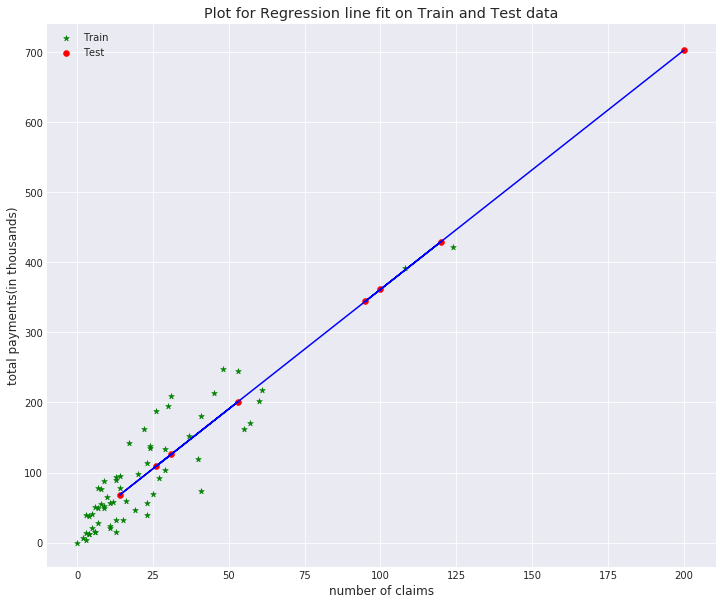

In [12]:
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create scatterplot
ax.scatter(X, y, marker='*', c='green', label='Train')
ax.scatter(X_test,y_pred, c='red', label='Test')
ax.plot(X_test, y_pred, color="b")
ax.legend()
# Set common labels
ax.set_xlabel('number of claims')
ax.set_ylabel('total payments(in thousands)')
ax.set_title('Plot for Regression line fit on Train and Test data')

plt.show()
# Save the figure, if needed
# fig.savefig('fig1.png', bbox_inches='tight')

#### Interpretation
We can observe that this closely approximates the data and regression line from the seaborn reg_plot is almost similar to it.